In [79]:
import pandas as pd
df = "Twitter Sentiments.csv"
df = pd.read_csv(df)

In [80]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [81]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [82]:
df.drop(columns=['id'],inplace=True)

In [83]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [84]:
import regex as re
## Removing special characters
df['tweet']=df['tweet'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))

In [113]:
df['tweet'][1201]

'an afternoon well spent on the water goodtimesgoodfriends  ampthankful lifewellspent'

In [85]:
df.head()

,label,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation


In [101]:
courpus = list(df['tweet'])

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2501)
X = cv.fit_transform(courpus).toarray()

In [105]:
len(cv.vocabulary_)

2501

In [86]:
from tensorflow.keras.preprocessing.text import one_hot
f = [one_hot(words,1000) for words in df['tweet']]

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(f,df['label'],test_size=0.2,random_state=42)

In [88]:
X_train[0]

[316, 316, 316, 496, 896, 869, 930, 192, 115, 939, 131, 634, 888, 59, 932]

In [89]:
y_train[0]

0

In [90]:
lengths = [len(text) for text in df['tweet']]
pd.DataFrame(lengths).mean()
pd.DataFrame(lengths).max()

0    139
dtype: int64

To perform RNN.
*   we need to have all the vectors in same size, so we do padding 0s.

In [91]:
from tensorflow.keras.preprocessing import sequence

max_len = 76
X_train = sequence.pad_sequences(X_train,maxlen=max_len)
X_test = sequence.pad_sequences(X_test,maxlen=max_len)

In [92]:
len(X_train[0])

76

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

input_dim = 2501  # Vocabulary size
output_dim = 64  # Embedding dimension
sequence_length = 76  # Length of your sequences (X_train[0]

# Define a minimal working example
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim))  # Removed input_length
model.add(SimpleRNN(128,activation="relu"))
model.add(Dense(1, activation='sigmoid'))

# Force build with a input shape
model.build(input_shape=(None, sequence_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 76, 64)         │       160,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_16 (SimpleRNN)       │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
y_train[0]

0

Simple RNN

In [107]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)


In [108]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_batch_size=0.2,callbacks=[es])

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9292 - loss: 0.2533
Epoch 2/10
  3/800 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9931 - loss: 0.0433  

c:\Users\ambal\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9468 - loss: 0.1469
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9569 - loss: 0.1216
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9613 - loss: 0.1018
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9699 - loss: 0.0805
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9777 - loss: 0.0593
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9840 - loss: 0.0452
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9886 - loss: 0.0331
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9908 - loss: 0.0278
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9930 - loss: 0.0209


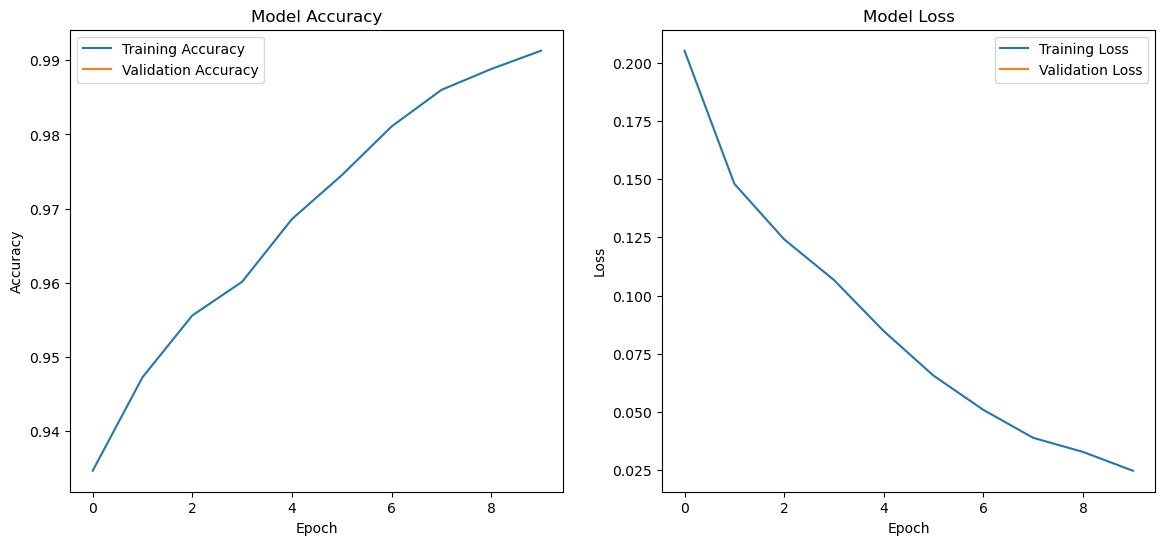

In [110]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')  # Using get to avoid KeyError
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')  # Using get to avoid KeyError
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [111]:
model.save("twitter_analysis.h5")